In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import joblib

In [2]:
data_arroz = arff.loadarff(r'C:\Users\flor_\Documents\parroz\proyecto_final\data\raw\Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data_arroz[0])
print(df)

         Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.825692   

      Convex_Area    Extent

In [3]:
df.head(100)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...
95,13524.0,487.468994,208.153427,83.614265,0.915773,13830.0,0.637925,b'Cammeo'
96,13677.0,494.635010,219.599564,79.631660,0.931936,13936.0,0.532096,b'Cammeo'
97,12921.0,476.746002,206.222626,80.403679,0.920862,13218.0,0.546921,b'Cammeo'
98,13251.0,460.532013,190.916306,88.997559,0.884700,13528.0,0.749915,b'Cammeo'


In [4]:
df.describe

<bound method NDFrame.describe of          Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.8256

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


# Limpieza datos (columna Class)

In [6]:
# Verificar los valores únicos en la columna 'Class'
print("Valores únicos antes de la limpieza:")
print(df['Class'].unique())

Valores únicos antes de la limpieza:
[b'Cammeo' b'Osmancik']


In [7]:
# Convertir los valores de bytes a strings y eliminar espacios en blanco
df['Class'] = df['Class'].apply(lambda x: x.decode('utf-8').strip())

In [8]:
# Convertir la columna 'Class' al tipo categórico
df['Class'] = df['Class'].astype('category')

In [9]:
# Verificar los valores únicos en la columna 'Class' después de la limpieza
print("Valores únicos después de la limpieza:")
print(df['Class'].unique())

Valores únicos después de la limpieza:
['Cammeo', 'Osmancik']
Categories (2, object): ['Cammeo', 'Osmancik']


In [10]:
# Visualizar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Mostrar la información del DataFrame para verificar los tipos de datos
print("Información del DataFrame:")
print(df.info())

Primeras filas del DataFrame:
      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0      15617.0  0.572896  Cammeo  
1      15072.0  0.615436  Cammeo  
2      14954.0  0.693259  Cammeo  
3      13368.0  0.640669  Cammeo  
4      15262.0  0.646024  Cammeo  
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Area               3810 non-null   float64 
 1   Perime

# Convertir datos categoricos a numericos


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Class"] = encoder.fit_transform(df["Class"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 223.4 KB


In [13]:
df["Class"].value_counts()

Class
1    2180
0    1630
Name: count, dtype: int64

In [14]:
# Guardar el DataFrame procesado en un archivo CSV
#df.to_csv(r'C:\Users\flor_\Documents\arroz_proyecto_final_ML\data\raw\Rice_Cammeo_Osmancik.csv', index=False)

# Visualizaciones


In [15]:
#Total filas y columnas 
df.shape

(3810, 8)

In [16]:
#Estadistica descriptiva
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,0.572178
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,0.000000
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862,0.000000
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,1.000000
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,1.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,1.000000


In [17]:
df.describe().T.style.background_gradient(axis=0)


,count,mean,std,min,25%,50%,75%,max
Area,3810.000000,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.000000,454.239180,35.597081,359.100006,426.144753,448.852493,483.683746,548.445984
Major_Axis_Length,3810.000000,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.000000,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.000000,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.000000,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.000000,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050
Class,3810.000000,0.572178,0.494828,0.000000,0.000000,1.000000,1.000000,1.000000


# Podemos visualizar respecto a las clases de arroz existentes en el estudio

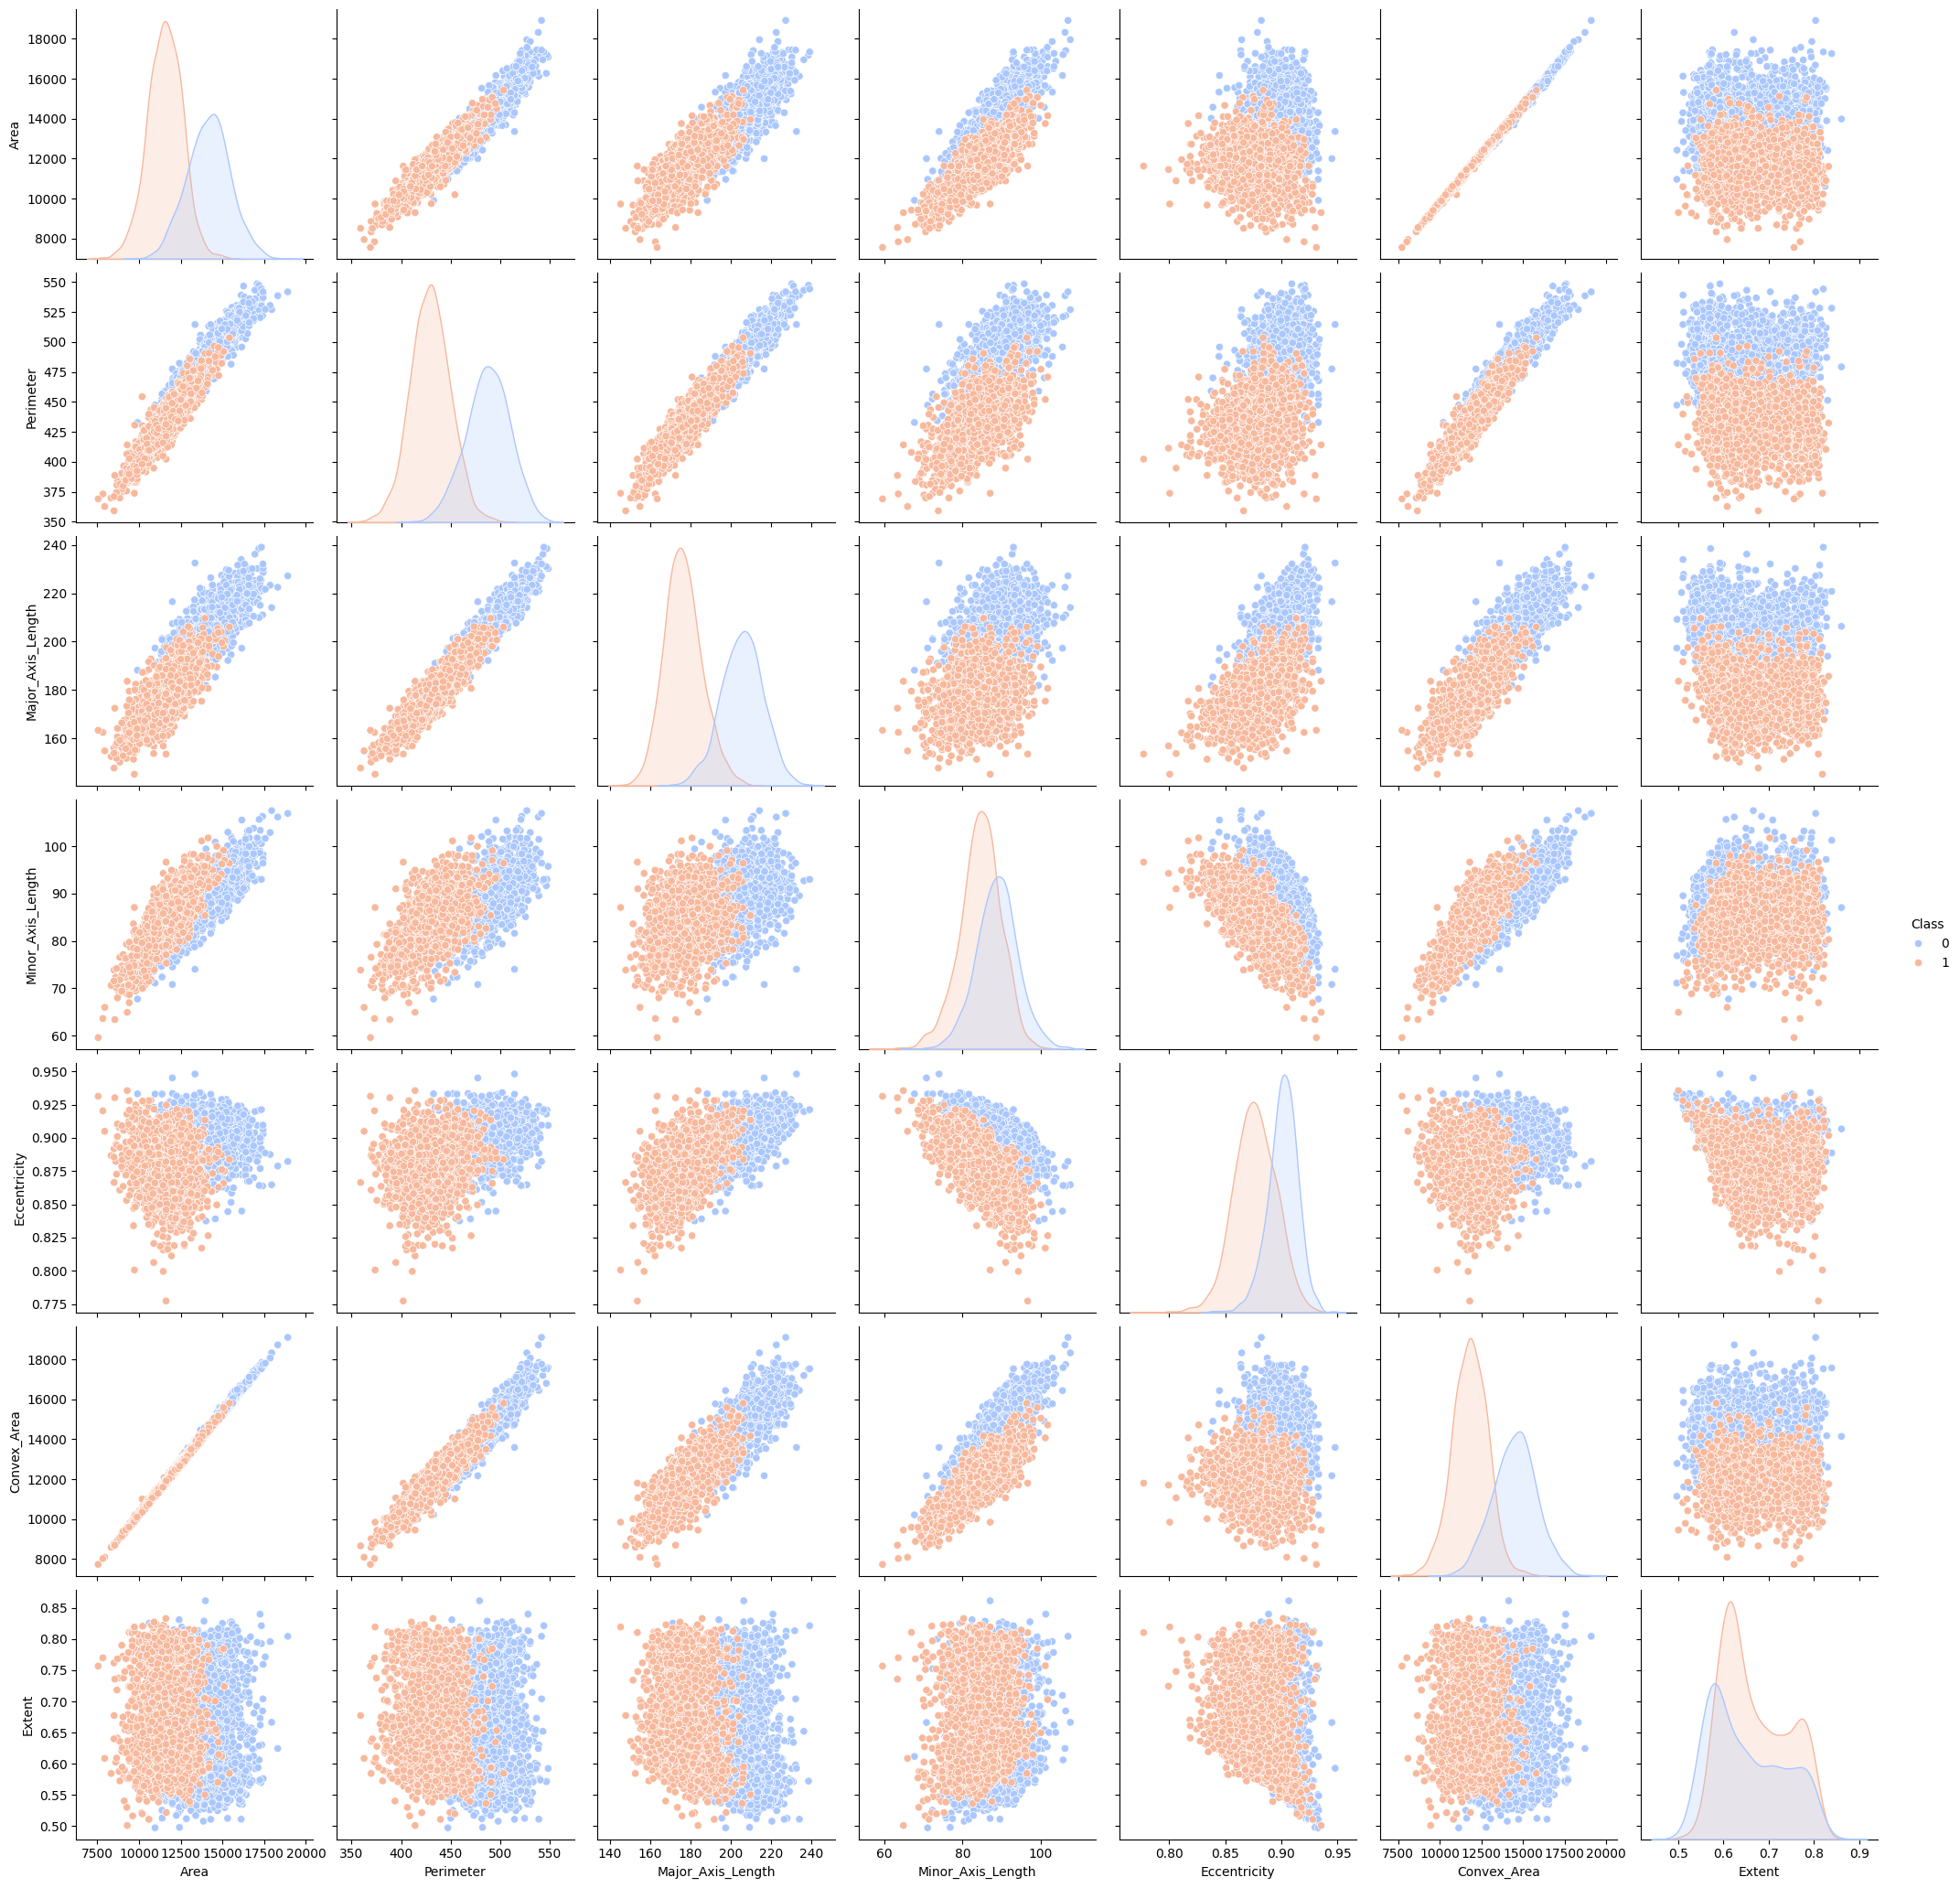

In [18]:
sns.pairplot(df, hue="Class", height=3, palette="coolwarm");

1.- Mapa de correlacion entre variables

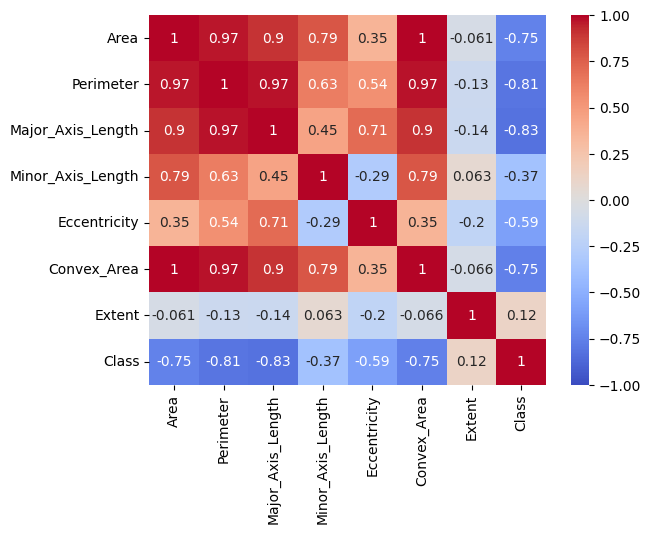

In [19]:
corr_mat = df.corr(numeric_only=True)

sns.heatmap(corr_mat, annot=True, cmap="coolwarm", vmin=-1);

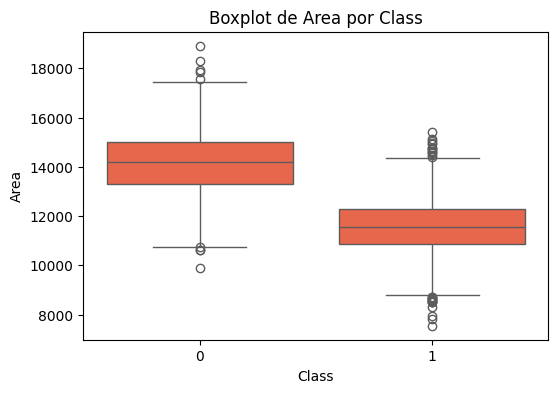

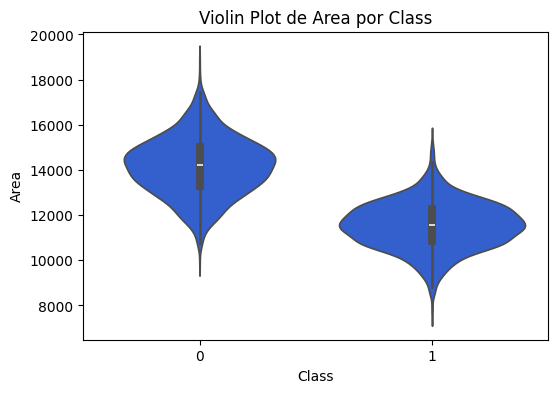

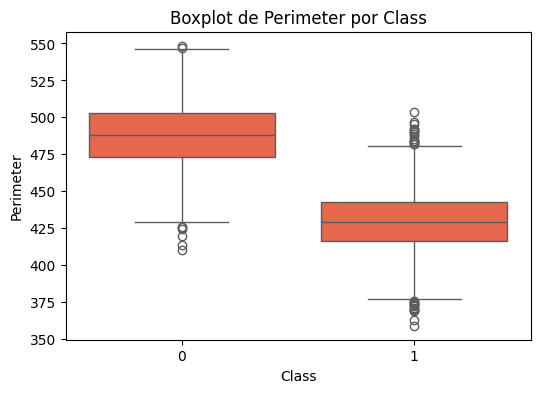

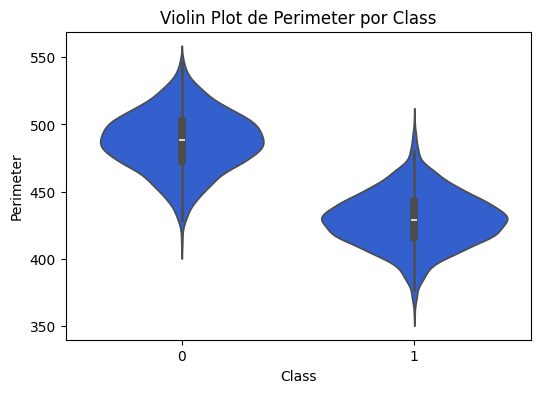

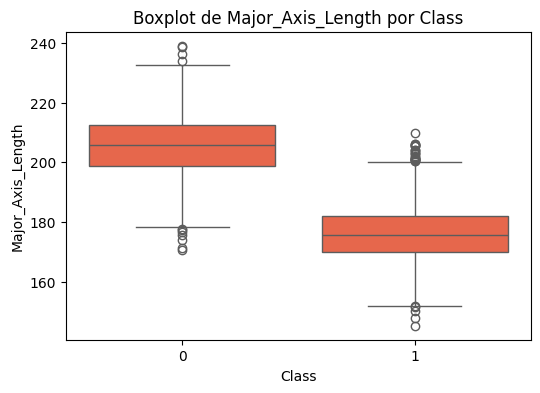

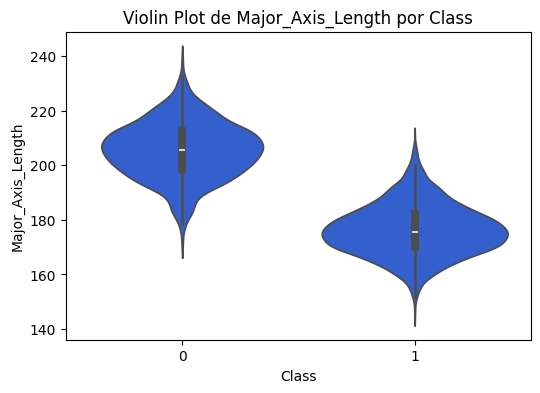

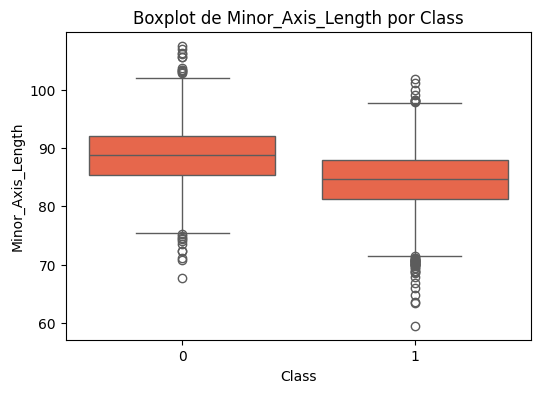

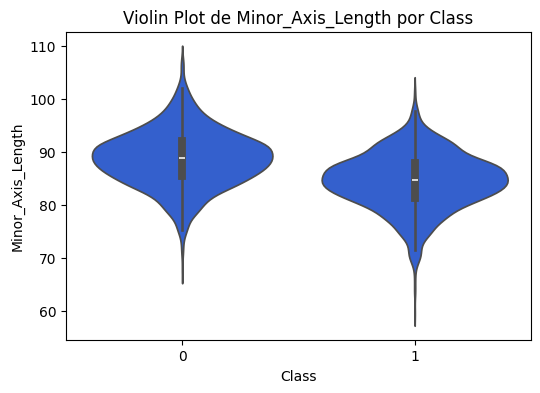

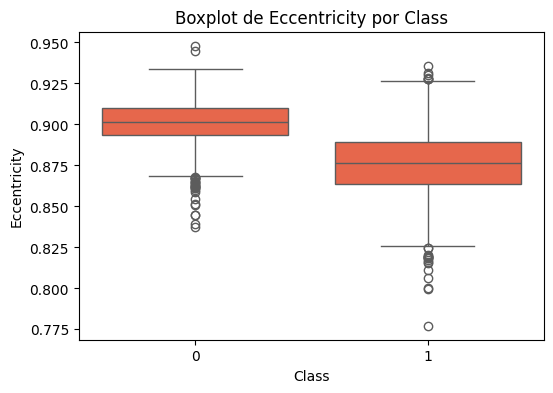

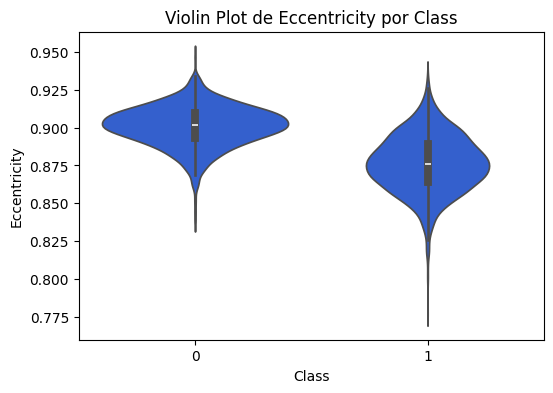

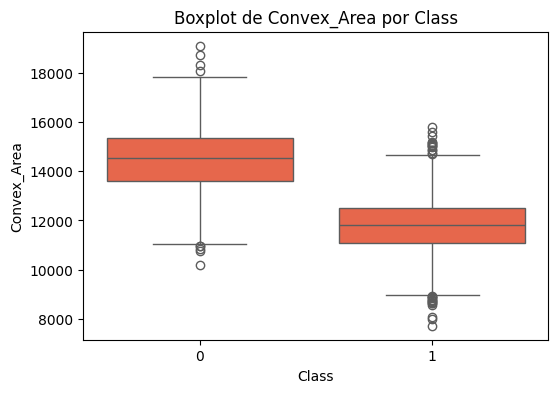

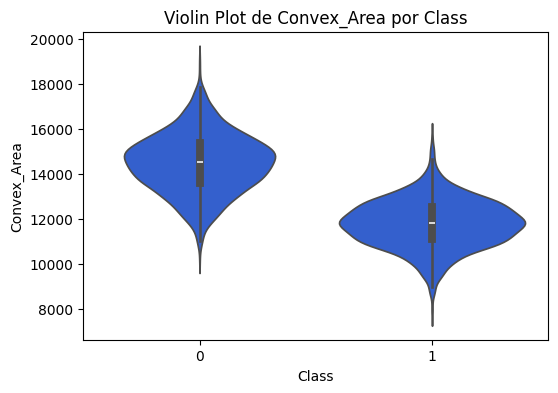

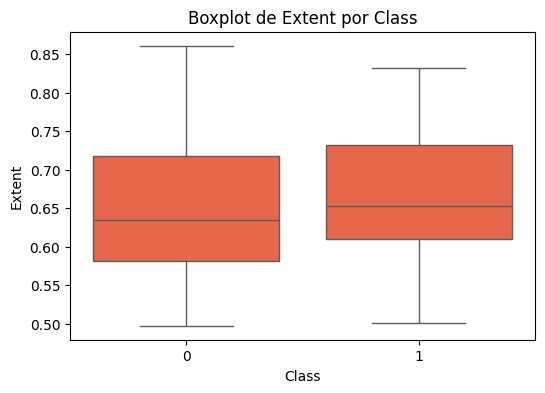

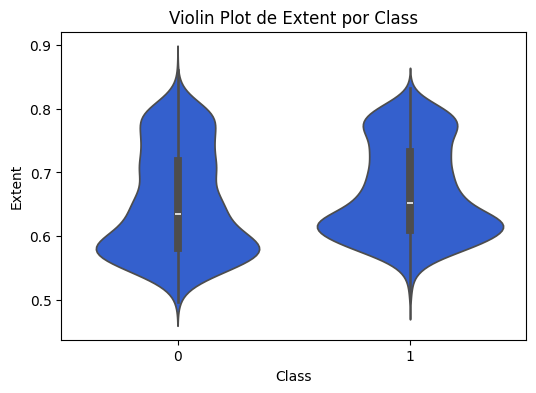

In [20]:
# Paso 2: Visualización de la Relación entre Variables Numéricas y `Class`
for column in df.drop(columns='Class').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=column, data=df, color="#ff5733")
    plt.title(f'Boxplot de {column} por Class')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Class', y=column, data=df, color="#1b55e6")
    plt.title(f'Violin Plot de {column} por Class')
    plt.show()

# Modelo

# Dividir los datos en train y test

# Separe el target de las features.

Features: Las características son las variables que se utilizarán para entrenar el modelo. En este conjunto de datos, las características son las medidas morfológicas de los granos de arroz. 



Target: El objetivo es la variable que se desea predecir o clasificar. En este conjunto de datos, el objetivo es la clase del grano de arroz. Hay dos posibles clases (Class:Cammeo y Osmancik)

In [21]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

# Features(X) y target(y)

In [22]:
features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent']

X = df[features]
y = df['Class']

# Datos de entrenamiento(X_train y_train) Evaluacion(X_test y_test)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3048, 7)
(762, 7)
(3048,)
(762,)


Escalar valores

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

Construir el modelo

In [26]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression()

log_r.fit(X_train_scal, y_train)

y_pred = log_r.predict(X_test_scal)

Guardar el modelo

In [37]:
joblib.dump(log_r,r'C:\Users\flor_\Documents\parroz\proyecto_final\models\modeloRegresionLogistica.pkl')

['C:\\Users\\flor_\\Documents\\parroz\\proyecto_final\\models\\modeloRegresionLogistica.pkl']

In [28]:
log_r.score(X_test_scal, y_test)

0.9291338582677166

Matriz de confusión

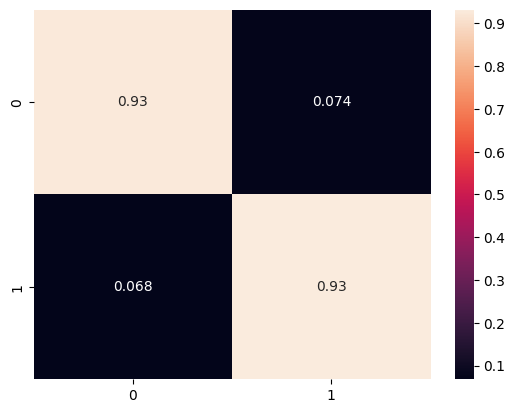

In [29]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True);

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       350
           1       0.94      0.93      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



<span style="color:#1b55e6">
Interpretacion del reporte:
</span>

<span style="color:#1b55e6">
Precision
</span>

<span style="color:#1c1f22">
Para la clase 0: La precisión es 0.92, lo que significa que el 92% de las veces que el modelo predijo 0, estaba en lo correcto.

</span>

<span style="color:#1c1f22">
Para la clase 1: La precisión es 0.94, lo que significa que el 94% de las veces que el modelo predijo 1, estaba en lo correcto.
</span>

<span style="color:#1b55e6">
Recall
</span>

<span style="color:#1c1f22">
Para la clase 0: El recall es 0.93, lo que significa que el 93% de las instancias que eran realmente 0 fueron correctamente clasificadas como 0 por el modelo.
</span>

<span style="color:#1c1f22">
Para la clase 1: El recall es 0.93, lo que significa que el 93% de las instancias que eran realmente 1 fueron correctamente clasificadas como 1.
</span>

<span style="color:#1b55e6">
F1-Score
</span>

<span style="color:#1c1f22">
Para la clase 0: El F1-score es 0.92, lo que indica un buen balance entre precisión y recall para esta clase.
</span>

<span style="color:#1c1f22">
Para la clase 1: El F1-score es 0.93, lo que indica un rendimiento ligeramente mejor en comparación con la clase 0.</span>

<span style="color:#1b55e6">
Accuracy
</span>

<span style="color:#1c1f22">
El modelo tiene una precisión global del 93%, significa que todas las instancias fueron correctamente clasificadas.</span>

<span style="color:red">
Curva ROC y área bajo la curva (AUC)
</span>

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.928876560332871

AUC (Área Bajo la Curva) Es una medida que varía entre 0 y 1, donde: 1(Indica un modelo perfecto que separa completamente las clases), 0.5(Indica un modelo sin capacidad discriminatoria, equivalente a una clasificación aleatoria), <0.5(Indica un modelo peor que aleatorio, lo cual es poco común en la práctica). AUC de 0.929: Este valor indica que el modelo tiene un excelente poder discriminatorio, es decir, es muy bueno para diferenciar entre las clases positivas y negativas.

In [32]:
from sklearn.metrics import roc_curve

y_pred_prob = log_r.predict_proba(X_test_scal)

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
pd.DataFrame({"tpr":tpr, "fpr":fpr, "threshold":threshold})

,tpr,fpr,threshold
0,0.000000,0.000000,inf
1,0.002427,0.000000,0.999951
2,0.521845,0.000000,0.982315
3,0.521845,0.002857,0.982244
4,0.599515,0.002857,0.973209
...,...,...,...
81,0.995146,0.480000,0.034415
82,0.997573,0.480000,0.034131
83,0.997573,0.500000,0.028817
84,1.000000,0.500000,0.027993


tpr (True Positive Rate), fpr (False Positive Rate), threshold (Umbral)

Text(0.5, 1.0, 'Curva ROC')

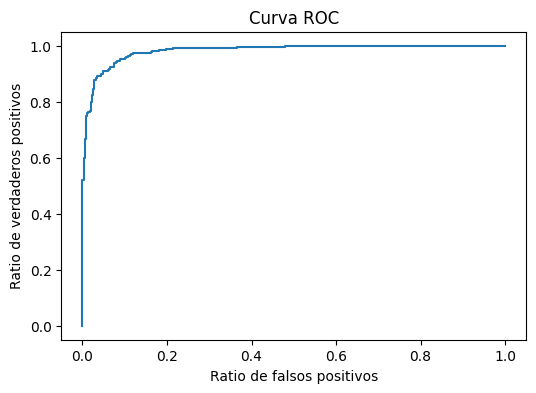

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)

plt.xlabel("Ratio de falsos positivos")
plt.ylabel("Ratio de verdaderos positivos")
plt.title("Curva ROC")

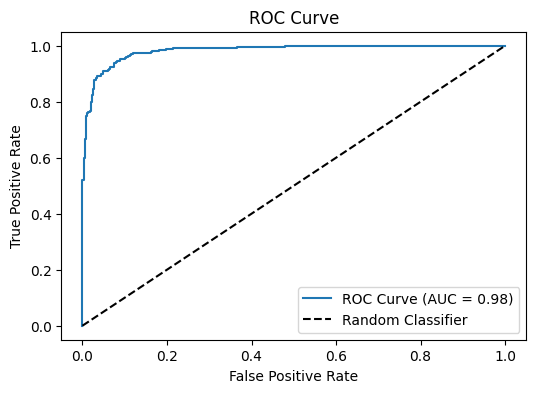

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = log_r.predict_proba(X_test_scal)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


curva P-R

In [35]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])
pd.DataFrame({"prec":prec[1:], "rec":rec[1:], "threshold":thresholds})[80:100]

,prec,rec,threshold
80,0.604993,1.0,0.003704
81,0.605882,1.0,0.003762
82,0.606775,1.0,0.003778
83,0.607670,1.0,0.003833
84,0.608567,1.0,0.003932
85,0.609467,1.0,0.003950
86,0.610370,1.0,0.004160
87,0.611276,1.0,0.004214
88,0.612184,1.0,0.004333
89,0.613095,1.0,0.004355


Text(0.5, 1.0, 'PR Curve')

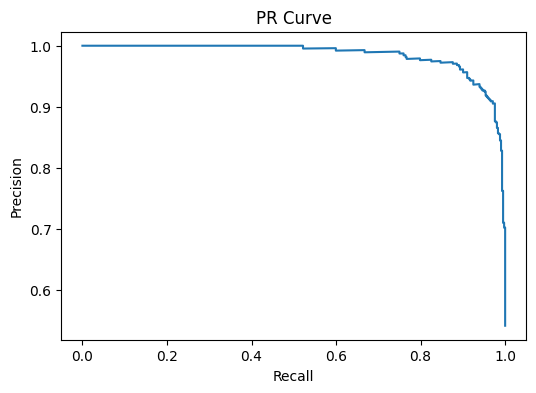

In [36]:
plt.figure(figsize=(6, 4))
plt.plot(rec, prec)

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.title("PR Curve")